## ATP Matches (2000 - 2017)

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
directory = r'ATP results - 2000 to 2017'

# store column entry count for each year
data = {}

for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        df = pd.read_csv(directory + '/' + filename)
        
        year = os.path.splitext(filename)[0][-4:]
        nrows, ncols = df.shape
        
        col_count = dict(df.count())
        colObj = {}
        for k, v in col_count.items():
            colObj[k] = round(v/nrows, 2)
        
        yearObj = {
            'nrows': nrows,
            'ncolumns': ncols,
            'col_density': colObj
        }
        
        data[year] = yearObj

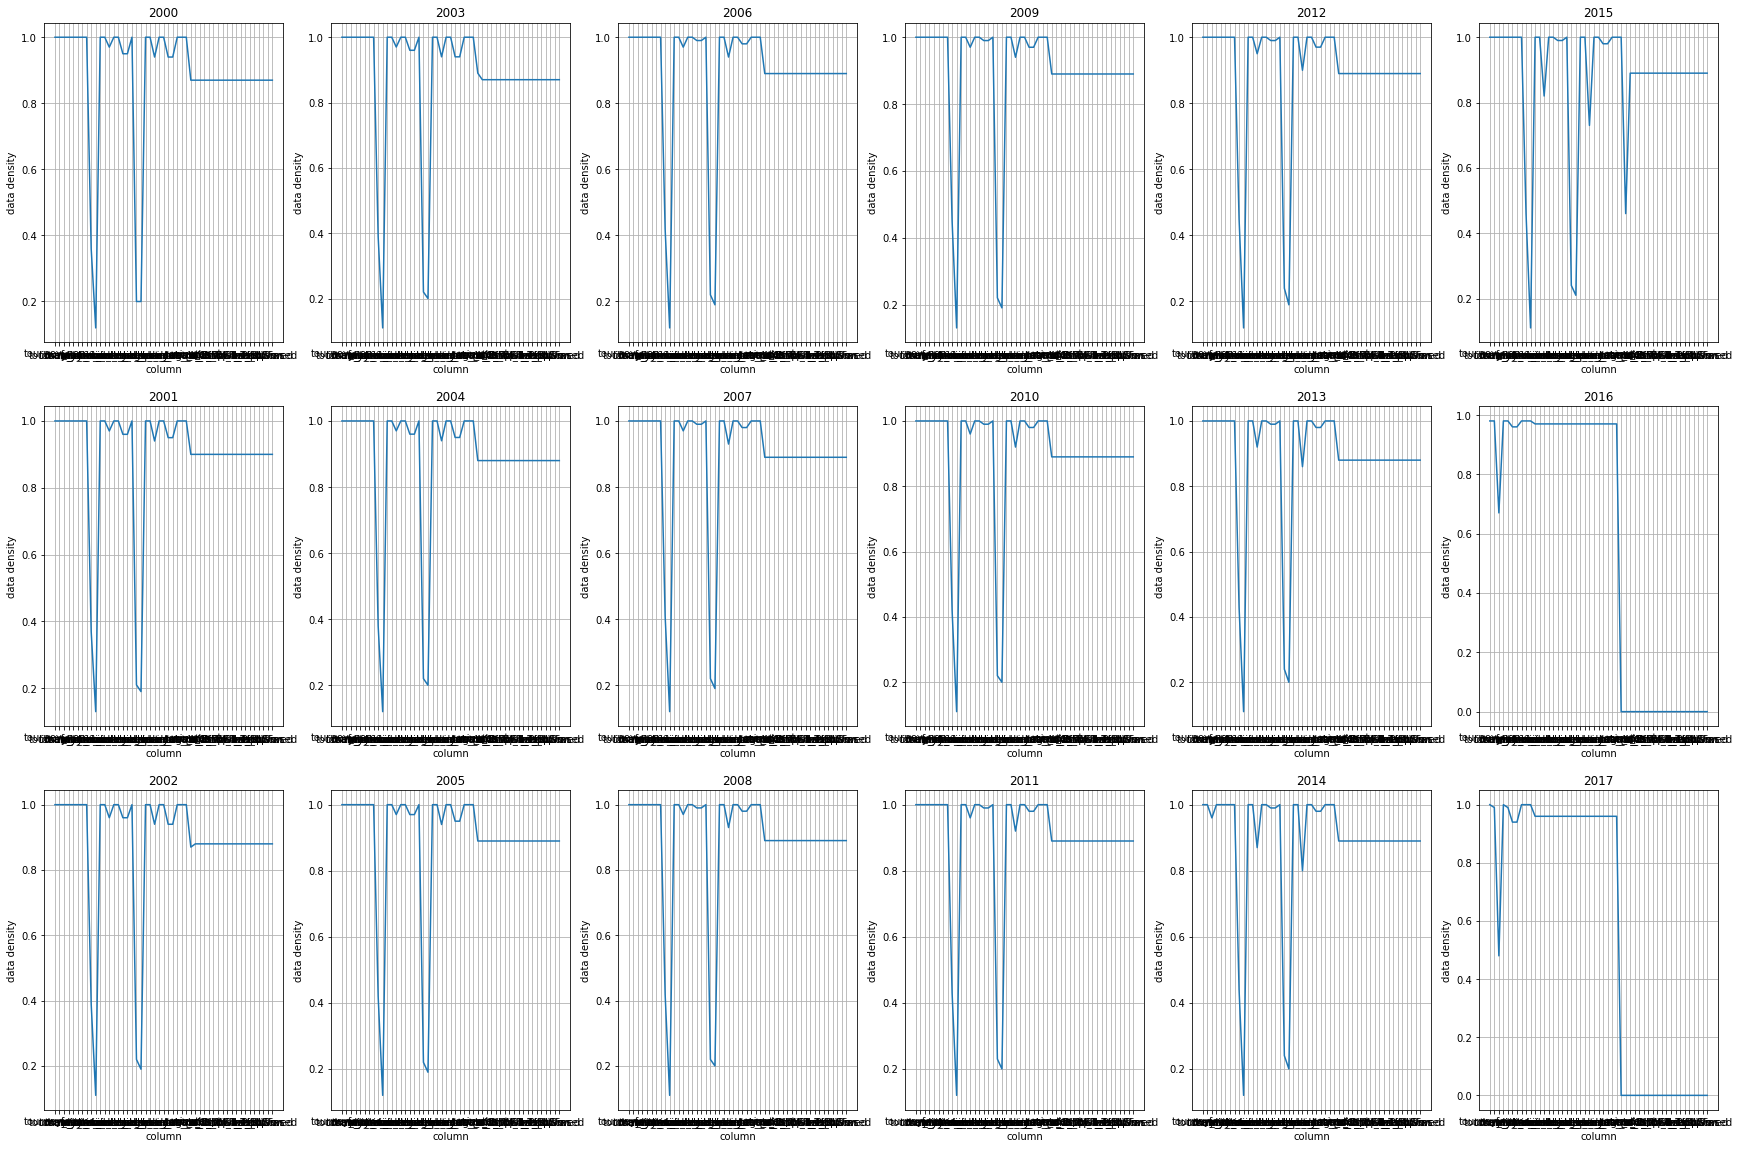

In [11]:
# plot data sparsity

years = len(data.keys())

fig, axs = plt.subplots(3 ,int(years/3), figsize=(30,20))

j = 0

for i in range(years):
    year = sorted(list(data.keys()))[i]
    columns = list(data[year]['col_density'].keys())
    values = list(data[year]['col_density'].values())
    
    axs[j][int(i/3)].plot(columns, values)
    axs[j][int(i/3)].set(xlabel='column', 
                    ylabel='data density',
                    title=f'{year}')
    axs[j][int(i/3)].grid()
    
    if j < 2:
        j += 1
    else:
        j = 0

plt.show()

In [4]:
# plot individual year

def plotYear(data, year):
    
    columns = list(data['col_density'].keys())
    values = list(data['col_density'].values())
    
    fig, ax = plt.subplots(figsize=(5,20))
    
    ax.plot(values, columns, '--')
    for i, val in enumerate(values):
        ax.annotate(int(val*data['nrows']), (values[i], columns[i]))
    ax.set(xlabel='data density', 
           ylabel='column',
           title=f'{year}')
    ax.grid()
    
    plt.show()

In [7]:
year = '2000'

print(f'Data points: {data[year]["nrows"]}')

Data points: 3364


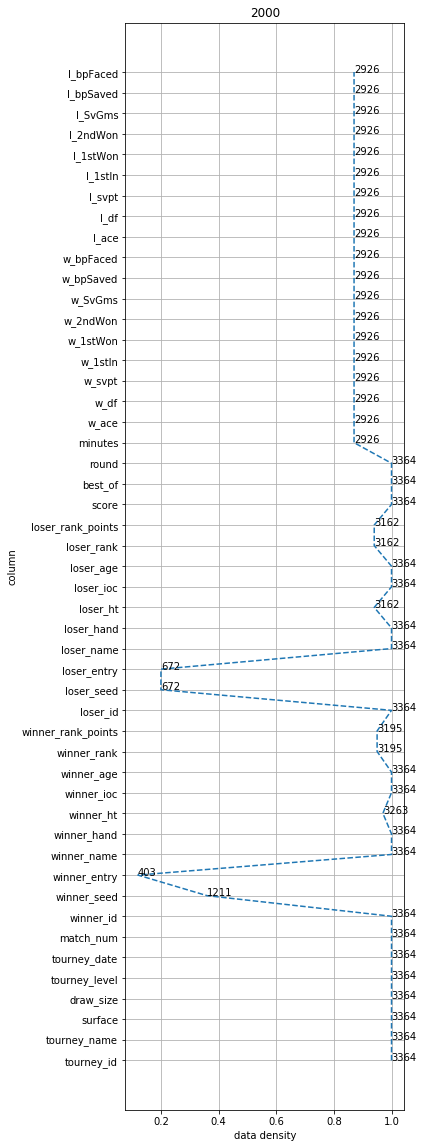

In [8]:
plotYear(data[year], year)